In [1]:
import os
os.chdir('/Users/yuxiding/Desktop/vis')

In [2]:
from GlucoCheck.glucoCheck import glucoCheckOps

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import random
from matplotlib import rc
from datetime import datetime

In [4]:
glucoCheckObject = glucoCheckOps()

Object Created!


In [5]:
glucoCheckObject.consolidatedData

,Display Time,GlucoseValue,subjectId
0,2016-06-21 00:00:00,197.0,GVP01
1,2016-06-21 00:15:00,208.0,GVP01
2,2016-06-21 00:30:00,226.0,GVP01
3,2016-06-21 00:45:00,241.0,GVP01
4,2016-06-21 01:00:00,250.0,GVP01
...,...,...,...
316522,2025-06-28 23:36:00,206.0,OD584
316523,2025-06-28 23:41:00,208.0,OD584
316524,2025-06-28 23:46:00,213.0,OD584
316525,2025-06-28 23:51:00,224.0,OD584


In [6]:
glucoCheckObject.train()

Training Model...



Epoch 1/1
200017/200017 [==============================] - 451s 2ms/step - loss: 0.0119
Model trained successfully!


In [7]:
def splitDay(data, uid):
    fmt_1 = '%Y-%m-%d %H:%M:%S'
    fmt_2 = '%Y-%m-%d %H'
    fmt_3 = '%Y-%m-%d'
    
    new = data[data['subjectId']==str(uid)]
    new = new.astype({'GlucoseValue':int})
    
    x = new.copy()
    x['Day'] = x['Display Time']
    for idx in range(x.shape[0]):      
        x['Day'].iloc[idx] = datetime.strptime(x['Display Time'].iloc[idx], fmt_1).strftime(fmt_3)
    dict_of_day = dict(iter(x.groupby('Day')))
        
    return x, dict_of_day

In [8]:
splitDay(glucoCheckObject.consolidatedData, '1636-69-032')[0]

,Display Time,GlucoseValue,subjectId,Day
51457,2016-01-13 12:58:17,122,1636-69-032,2016-01-13
51458,2016-01-13 13:03:17,123,1636-69-032,2016-01-13
51459,2016-01-13 13:08:17,124,1636-69-032,2016-01-13
51460,2016-01-13 13:13:17,128,1636-69-032,2016-01-13
51461,2016-01-13 13:18:17,133,1636-69-032,2016-01-13
...,...,...,...,...
53235,2016-01-19 17:12:49,101,1636-69-032,2016-01-19
53236,2016-01-19 17:17:49,98,1636-69-032,2016-01-19
53237,2016-01-19 17:22:49,101,1636-69-032,2016-01-19
53238,2016-01-19 17:27:49,106,1636-69-032,2016-01-19


In [9]:
def plotDay(uid, data):
    
    dic_day = splitDay(data, uid)[1] 
    for i in dic_day:
        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        
        new = dic_day[i]
        new = new.astype({'GlucoseValue':int})
        new['Display Time'] = pd.to_datetime(new['Display Time'])

        lines = ax1.plot_date(new['Display Time'], new['GlucoseValue'], linestyle='None', marker='o', mfc='none')
        new['Display Time'] = pd.to_datetime(new['Display Time'])
        ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
        plt.xticks(rotation=30)
        plt.title('Glucose Values for\n' + str(i), fontsize=17, weight='bold')
        plt.xlabel('Display Time', fontsize=15, weight='bold')
        plt.ylabel('Glucose Values',fontsize=15, weight='bold')


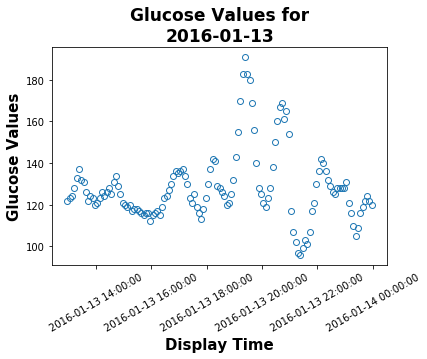

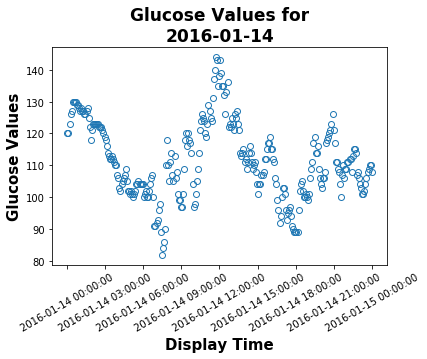

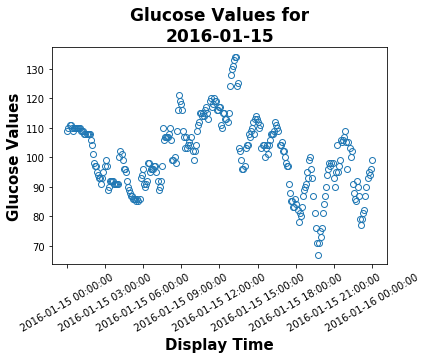

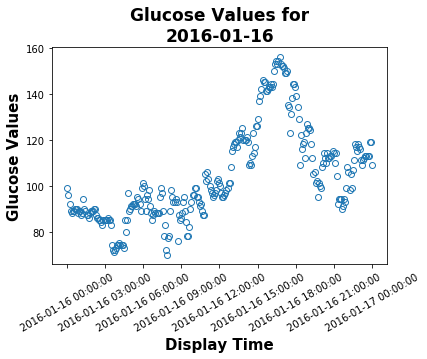

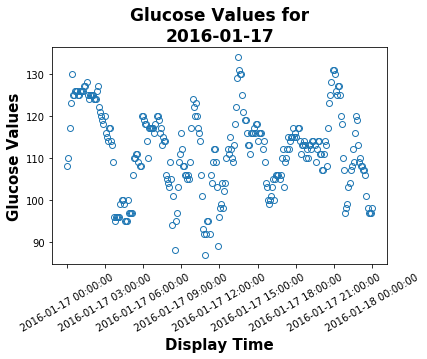

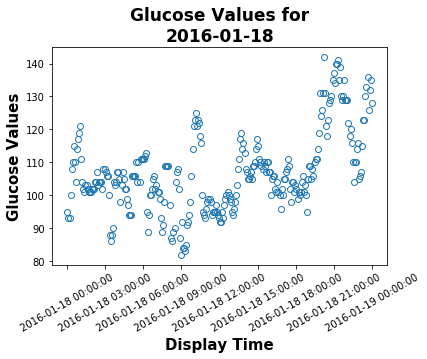

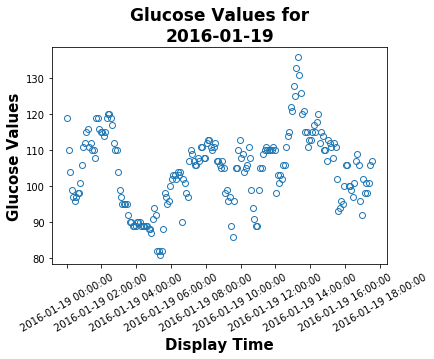

In [10]:
plotDay('1636-69-032', data = glucoCheckObject.consolidatedData)

In [11]:
def plotIndividual(uid, data):
    """
        This method plots the graph of the Glucose Values of a single Subject ID. The subject ID can be found as a part of the description of the data. The default data includes data from the CGMAnalysis package, Gluvarpro package, CGMAnalyzer package, and the Ohio University dataset. The user may specify their own data if they wish to. The subject ID is a part of the data supplied by the user. 
        Function Parameters:
        uid: The subject ID of the user to plot  type: String
        data: the dataset (CSV file) entered by the user to train the model. It should have the following format:
        Display Time     object
        GlucoseValue    float64
        subjectId        object
        type: pandas DataFrame
        Return:
        A line graph of the Subject ID's Glucose Value fluctuations with respect to the timestamp
    """
    
    new = data[data['subjectId']==str(uid)]
    new = new.astype({'GlucoseValue':int})
    new['Display Time'] = pd.to_datetime(new['Display Time'])
                  
    fig = plt.figure(figsize=(16, 8), dpi=80)
    rc('font', weight='bold')
    ax1 = fig.add_subplot(111)
    lines = ax1.plot(new['Display Time'], new['GlucoseValue'], linestyle='None', marker='o', mfc='none')
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
    

    plt.xticks(rotation=30)
    plt.title('Glucose Values for\n' + str(uid), fontsize=18, weight='bold')
    plt.xlabel('Display Time', fontsize=15, weight='bold')
    plt.ylabel('Glucose Values',fontsize=15, weight='bold')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
    

    

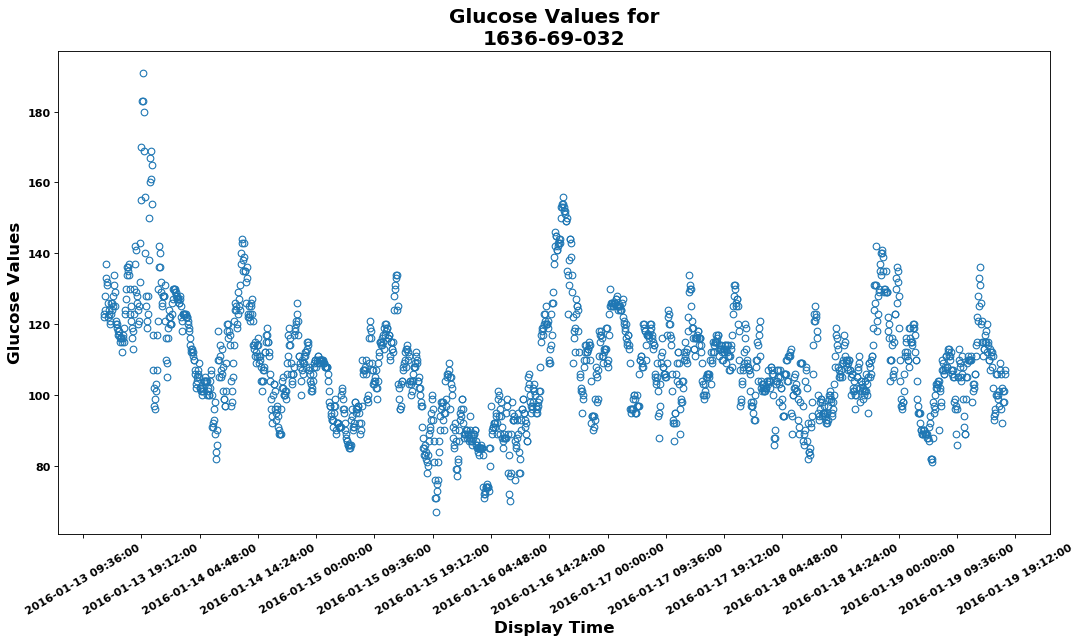

In [12]:
plotIndividual('1636-69-032', data = glucoCheckObject.consolidatedData)

In [13]:
test_data = glucoCheckObject.consolidatedData[glucoCheckObject.consolidatedData['subjectId']=='1636-69-032']

In [14]:
def readData():
    """
    Reading Data 
    input:
        none
    output:
        data: dataframe with index => DisplayTime value => GlucoseValues
    """
    
    data = pd.read_csv("/Users/yuxiding/Desktop/oneperson.csv")
    #data.head()
    
    #run only once
    #dropping columns we don't need
    #data.drop(['subjectId', 'Internal Time'], axis=1, inplace=True)
    #df = data['GlucoseValue']
    #df.index = data['Display Time']
    
    #Converting the Display Time to 'datetime' so that it can be used as an index
    data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    data = data.set_index(['Display Time'], drop=True)
    #data.head()
    
    return data

def createGap(data):
    """
    Creating Gap indexes
    input:
        data: dataframe with index => DisplayTime value => GlucoseValues
    output:
        start: seed
        end: seed+gap (gap=250)
    """
    
    seed = random.randint(500,len(data)-500)
    
    return seed,seed+250

def faultyData(df,start,end):
    """
    Creating a Gap
    input:
        start: seed
        end: seed+gap (gap=250)
    output:
        df: dataframe with index => DisplayTime value => GlucoseValues and a gap from start to end (inputs)
    """
    
    #df = readData()
    for i in range(start,end):
        df['GlucoseValue'][i]=0
    
    return df

In [ ]:
    new = data[data['subjectId']==str(uid)]
    new = new.astype({'GlucoseValue':int})
    new['Display Time'] = pd.to_datetime(new['Display Time'])
                  
    fig = plt.figure(figsize=(16, 8), dpi=80)
    rc('font', weight='bold')
    ax1 = fig.add_subplot(111)
    lines = ax1.plot(new['Display Time'], new['GlucoseValue'], linestyle='None', marker='o', mfc='none')
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
    

    plt.xticks(rotation=30)
    plt.title('Glucose Values for\n' + str(uid), fontsize=18, weight='bold')
    plt.xlabel('Display Time', fontsize=15, weight='bold')
    plt.ylabel('Glucose Values',fontsize=15, weight='bold')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(20))

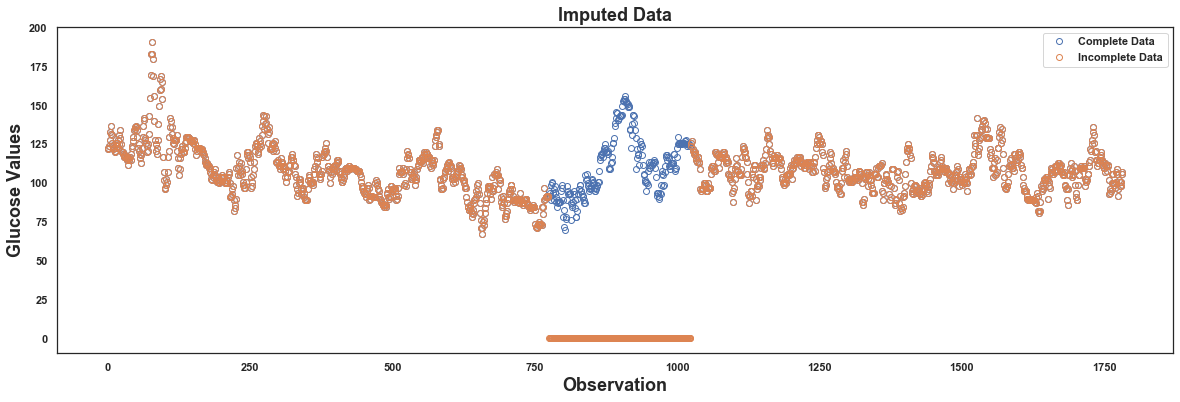

In [19]:
actual_data = readData()
start,end = createGap(readData())

gapped_data = readData()
gapped_data = faultyData(gapped_data,start,end-1)


a = actual_data['GlucoseValue'].tolist()
b = gapped_data['GlucoseValue'].tolist()

plt.figure(figsize=(20, 6))
plt.plot(a, label='Complete Data', linestyle='None', marker='o', mfc='none')
plt.plot(b, label='Incomplete Data', linestyle='None', marker='o', mfc='none')
plt.title("Imputed Data", fontsize=18, weight='bold')
plt.xlabel('Observation', fontsize=18, weight='bold')
plt.ylabel('Glucose Values', fontsize=18, weight='bold')
plt.legend()
plt.show();
